In [33]:
from mlxtend.plotting.decision_regions import plot_decision_regions
import matplotlib.pyplot as plt
class MultiClass:
    
    def __init__(self, lr=0.1, n_iters=10000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self,X,y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

       
        for _ in range(self.n_iters):
            linear_model = X @ self.weights + self.bias
            hx = self._sigmoid(linear_model)
            
            dw = (X.T * (hx - y)).T.mean(axis=0)
            db = (hx - y).mean(axis=0)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db 

    def predict(self,X):
        linear_model = np.dot(X,self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return y_predicted
  
    def _sigmoid(self,x):
        return(1/(1+np.exp(-x)))

In [34]:
class MultiSVM:
    
    def __init__(self):
        self.models = []

    def fit(self, X, y):
        """
        Fits each model
        """
        for y_i in np.unique(y):
            

            
            x_true = X[y == y_i]
            
            x_false = X[y != y_i]
            x_true_false = np.vstack((x_true, x_false))

            
            y_true = np.ones(x_true.shape[0])
            
            y_false = np.zeros(x_false.shape[0])
           
            y_true_false = np.hstack((y_true, y_false))

            
            model = MultiClass()
            model.fit(x_true_false, y_true_false)
            self.models.append([y_i, model])


    def predict(self, X):
        y_pred = [[label, model.predict(X)] for label, model in self.models]

        output = []

        for i in range(X.shape[0]):
            max_label = None
            max_prob = -10**5
            for j in range(len(y_pred)):
                prob = y_pred[j][1][i]
                if prob > max_prob:
                    max_label = y_pred[j][0]
                    max_prob = prob
            output.append(max_label)

        return output

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [36]:
iris = load_iris()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)

clf = MultiSVM()

clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, clf.predict(X_test))
print(f"Accuracy  Score = {ac}")

Accuracy  Score = 0.9333333333333333


/Users/pankajgope/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


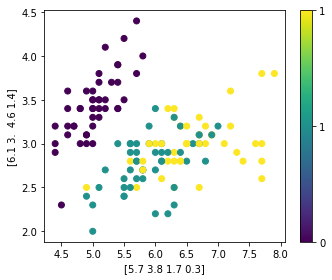

In [38]:
x_index = 0
y_index = 1
formatter = plt.FuncFormatter(lambda i, *args: y_train[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(X_train[:, x_index], X_train[:, y_index], c=y_train)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(X_train[x_index])
plt.ylabel(X_train[y_index])

plt.tight_layout()
plt.show()

In [39]:
import sklearn.svm as svm 
model = svm.SVC()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("The accuracy of the SVM is ", accuracy_score(prediction,y_test))

The accuracy of the SVM is  0.9333333333333333


In [40]:
sk_model=svm.SVC(kernel='linear', C=10)
sk_model.fit(X_train, y_train.astype(np.int32))
prediction2 = model.predict(X_test)
print("The accuracy of the SVM is ", accuracy_score(prediction2,y_test))

The accuracy of the SVM is  0.9333333333333333


In [41]:
sk_model=svm.SVC(kernel='rbf', C=10)
sk_model.fit(X_train, y_train.astype(np.int32))
prediction2 = model.predict(X_test)
print("The accuracy of the SVM is ", accuracy_score(prediction2,y_test))

The accuracy of the SVM is  0.9333333333333333


In [42]:
sk_model=svm.SVC(kernel='poly', C=10)
sk_model.fit(X_train, y_train.astype(np.int32))
prediction2 = model.predict(X_test)
print("The accuracy of the SVM is ", accuracy_score(prediction2,y_test))

The accuracy of the SVM is  0.9333333333333333
